In [25]:
import numpy as np, random
from numpy import asarray
import cv2
from google.colab.patches import cv2_imshow

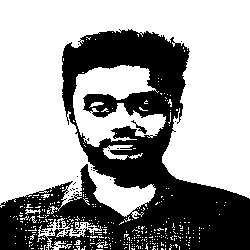

In [26]:
original_img = cv2.imread('/content/pic.jpg',2)
ret, bw_img1 = cv2.threshold(original_img,127,255,cv2.THRESH_BINARY)
cv2_imshow(bw_img1)


In [27]:
imgArray1 = asarray(bw_img1, dtype=np.uint8)
original_data = np.zeros(imgArray1.shape)
original_data[imgArray1 > 0] = 1
original_data[original_data == 0] = -1 
original_data                         # original data for training

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

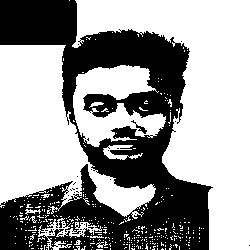

In [28]:
distorted_img = cv2.imread('/content/pic3.jpg',2)
ret, bw_img2 = cv2.threshold(distorted_img,127,255,cv2.THRESH_BINARY)
cv2_imshow(bw_img2)

In [29]:
imgArray2 = asarray(bw_img2, dtype=np.uint8)
distorted_data = np.zeros(imgArray2.shape)
distorted_data[imgArray2 > 0] = 1
distorted_data[distorted_data == 0] = -1 
distorted_data                            # distorted data for testing

array([[-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

In [30]:
weight = np.dot(original_data.transpose(), original_data)
np.fill_diagonal(weight, 0)   #fills the diagonal positions of weight matrix with zeros
weight

array([[  0., 242., 242., ..., 234., 234., 236.],
       [242.,   0., 246., ..., 234., 234., 236.],
       [242., 246.,   0., ..., 238., 238., 240.],
       ...,
       [234., 234., 238., ...,   0., 250., 248.],
       [234., 234., 238., ..., 250.,   0., 248.],
       [236., 236., 240., ..., 248., 248.,   0.]])

In [31]:
def test(test_data,weight):
    
    y = test_data.copy()
    threshold = 20
    count = 0
    y_prev = np.zeros(y.shape)

    while 1:
      i = np.random.choice(range(len(y)))
      j = np.random.choice(range(len(y[0])))
      y[i,j] = test_data[i, j] + np.dot(y[i,:], weight[:, j])
      if y[i,j] > 0:
        y[i,j] = 1
      else:
        y[i,j] = -1
      if y[i,j] == y_prev[i, j]:
        count += 1
        #print("count: ",count)
        if count >= threshold:
          return y
          break
      else:
        count = 0
      y_prev[i,j] = y[i,j].copy()

In [32]:
prediction = test(distorted_data,weight)

In [33]:
print(prediction)

[[ 1. -1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1.  1.]
 [-1. -1. -1. ...  1. -1. -1.]]


In [34]:
correct = 0
incorrect = 0
boolean = np.equal(original_data,prediction)
for i in range(len(original_data)):
  for j in range(len(original_data[0])):
    if boolean[i,j] == False:
      incorrect += 1
    else:
      correct += 1
accuracy = (correct/ (correct+incorrect)) * 100
print("Accuracy: {}%".format(np.round(accuracy, 2)))

Accuracy: 87.78%


In [35]:
recovered = np.zeros(imgArray2.shape, dtype=np.uint8)
recovered[prediction == 1] = 255
recovered[prediction == -1] = 0

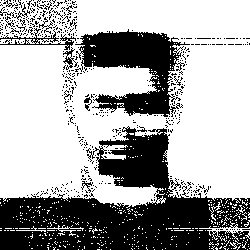

In [36]:
img = Image.fromarray(recovered)
display(img)

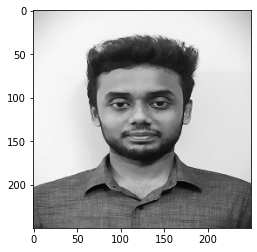

In [ ]:

img = rgb2gray(plt.imread('/content/pic.jpg'))
plt.imshow(img, cmap='gray')

In [ ]:
imgArray = asarray(img)
original_data = np.zeros(imgArray.shape, dtype=np.uint8)
original_data[imgArray > 0.3] = 1
#original_data

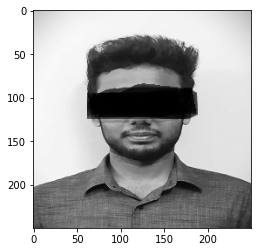

In [ ]:
img2 = rgb2gray(plt.imread('/content/pic2.jpg'))
plt.imshow(img2, cmap='gray')

In [ ]:
imgArray2 = asarray(img2)
distorted_data = np.zeros(imgArray2.shape, dtype=np.uint8)
distorted_data[imgArray2 > 0.3] = 1

In [ ]:
weight = np.dot(original_data.transpose(), original_data)
np.fill_diagonal(weight, 0)   #fills the diagonal positions of weight matrix with zeros
#weight

In [ ]:
def test(test_data,weight):
    
    y = test_data
    threshold = 30
    count = 0
    y_prev = np.zeros(y.shape)

    while 1:
      for i in range(len(y)):
        for j in range(len(y[0])):
          y[i,j] = test_data[i, j] + np.dot(y[i,:], weight[:, j])
          if y[i,j] > 0:
            y[i,j] = 1
          else:
            y[i,j] = 0
          if y[i,j] == y_prev[i, j]:
            count += 1
            if count >= threshold:
              return y
              break
          else:
            count = 0
          y_prev[i,j] = y[i,j]

In [ ]:
prediction = test(distorted_data,weight)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print(prediction)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
correct = 0
incorrect = 0
boolean = np.equal(original_data,prediction)
for i in range(len(original_data)):
  for j in range(len(original_data[0])):
    if boolean[i,j] == False:
      incorrect += 1
    else:
      correct += 1
accuracy = (correct/ (correct+incorrect)) * 100
print("Accuracy: {}%".format(np.round(accuracy, 2)))

Accuracy: 84.37%


In [ ]:
#output = np.zeros(prediction.shape, dtype=np.uint8)
#output[prediction==1] = 255
#output[prediction==-1] = 0

In [ ]:
#img = Image.fromarray(prediction,mode="L")
#display(img)

In [ ]:
#for i in range(len(y)):
        #for j in range(len(y[0])):
          y[i,j] = test_data[i, j] + np.dot(test_data[i,:], weight[:, j])
          if y[i,j] > 0:
            y[i,j] = 1
          else:
            y[i,j] = -1
          if y[i,j] == y_prev[i, j]:
            count += 1
            print("count: ",count)
            if count >= threshold:
              return y_prev
              break
          else:
            count = 0
          y_prev[i,j] = y[i,j]